# Part 2 - Exercise 2
### Financial Data Analysis

In this exercise we will be exploring some past financial data and having a look at the trends.

In [6]:
import pandas as pd
dataframe = pd.read_csv("../course content/Part2_Materials/Exercises/us_stocks.csv")
dataframe.head()

,Unnamed: 0,Open,Open.1,Open.2,Open.3,Open.4,Open.5,High,High.1,High.2,...,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5
0,NaN,AXP,FB,INTC,MCD,PG,WMT,AXP,FB,INTC,...,INTC,MCD,PG,WMT,AXP,FB,INTC,MCD,PG,WMT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-31,40.900002,NaN,20.6,62.970001,61.52,54.25,41.080002,NaN,20.719998999999998,...,15.252899,47.055138,45.146072,42.548668,4030500,NaN,26429200,4495300,5942200,9764800
3,2010-01-04,40.810001,NaN,20.790001,62.630001,61.110001000000004,53.740002000000004,41.099998,NaN,21.030001000000002,...,15.611791,47.311375,45.510940999999995,43.169579,6894300,NaN,47800900,5839300,9190800,20753100
4,2010-01-05,40.830002,NaN,20.940001000000002,62.66,61.130001,54.09,41.23,NaN,20.99,...,15.604316,46.949627,45.525822,42.739723,10641200,NaN,52357700,7099000,8649400,15648400


In [40]:
# This csv is a bit messy, the stock names are in row 0
#dataframe.columns

# First we'll grab just the data we care about
dataframe = dataframe[["Unnamed: 0",
           "Adj Close",
           "Adj Close.1",
           "Adj Close.2",
           "Adj Close.3",
           "Adj Close.4",
           "Adj Close.5"]]
print(dataframe.head())

# And then extract the stock tickers
stock_names = list(dataframe.loc[0][1:].values)
print("Stock names: {}".format(stock_names))

   Unnamed: 0           Adj Close Adj Close.1 Adj Close.2 Adj Close.3  \
0         NaN                 AXP          FB        INTC         MCD   
1        Date                 NaN         NaN         NaN         NaN   
2  2009-12-31           35.271194         NaN   15.252899   47.055138   
3  2010-01-04  35.619372999999996         NaN   15.611791   47.311375   
4  2010-01-05  35.541039000000005         NaN   15.604316   46.949627   

          Adj Close.4 Adj Close.5  
0                  PG         WMT  
1                 NaN         NaN  
2           45.146072   42.548668  
3  45.510940999999995   43.169579  
4           45.525822   42.739723  
Stock names: ['AXP', 'FB', 'INTC', 'MCD', 'PG', 'WMT']


In [71]:
# Now make the dataframe just the dates
columns = ["Date"] + stock_names
print("Columns: {}".format(columns))
# Drop the weird header rows
df = dataframe.drop([0,1])
# Change the column names to what we want
df.columns = columns
# And there's probably a better way to do this but,
# Save it as a .csv so we can pull it in again
df.to_csv("../exercises/fixed_stock_data.csv")
df = pd.read_csv("fixed_stock_data.csv", parse_dates=["Date"], index_col="Date")
df = df.drop(columns = "Unnamed: 0")
df.head()

Columns: ['Date', 'AXP', 'FB', 'INTC', 'MCD', 'PG', 'WMT']


,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2009-12-31,35.271194,NaN,15.252899,47.055138,45.146072,42.548668
2010-01-04,35.619373,NaN,15.611791,47.311375,45.510941,43.169579
2010-01-05,35.541039,NaN,15.604316,46.949627,45.525822,42.739723
2010-01-06,36.115540,NaN,15.551979,46.309067,45.309883,42.644184
2010-01-07,36.701283,NaN,15.402434,46.648193,45.064171,42.668079


Great! After that data wrangling, we're ready to start the actual exercise!

1) Visualize the Adjusted Close of the six stocks over time

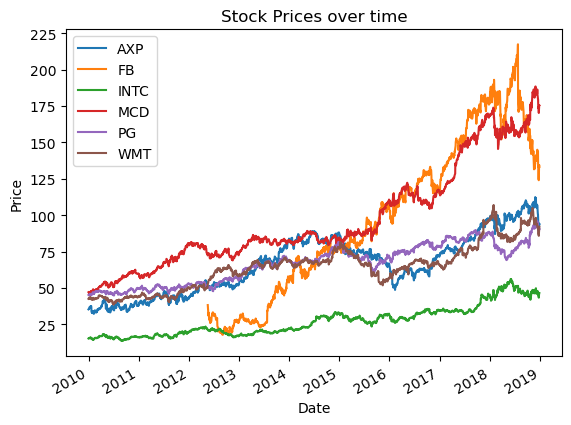

In [83]:
import matplotlib.pyplot as plt
df.resample("M").mean()
for stock in df:
    df[stock].plot()

plt.title("Stock Prices over time")
plt.ylabel("Price")
plt.legend()
plt.show()